In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics as metrics
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import xgboost as xgb 
import warnings
warnings.filterwarnings("ignore")

# 1. Data Processing

In [2]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)

In [3]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Building the column names for our Adult dataset

list_of_columns = ["age", "workclass", "fnlwgt","education","education_num","marital_status","occupation","relationship",
                   "race","sex","capital_gain","capital_loss","hours_per_week","native_country","salary"]

# Set these list of columns into the adult_df dataframe
adult_df.columns = list_of_columns



In [5]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
adult_df.shape

(32561, 15)

In [7]:
# Dropping the column "fnlwgt" as it is not necessary for the homework
adult_df.drop('fnlwgt', axis=1, inplace=True)

In [8]:
adult_df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
adult_df.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [10]:
adult_df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [11]:
# Using the .replace() method to convert a salary column into a binary feature
adult_df["salary"].replace({'<=50K':0, '>50K':1}, inplace=True)

In [12]:
adult_df["salary"].head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64

In [13]:
# Creating X and Y variable for our dataframe

X = adult_df.drop(columns='salary')
print(X.shape)
y = adult_df["salary"]
print(y.shape)

(32561, 13)
(32561,)


In [14]:
# Getting the frequency of each of the binary values in the Y variable
y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [15]:
# One-hot encoding on the X variable

X_encoded = pd.get_dummies(X)


In [16]:
X_encoded.shape

(32561, 107)

In [17]:
# Splitting the one-hote encoded X variable into train test datasets
X_train, X_test, y_train, y_test= train_test_split(X_encoded, y, test_size=0.3, random_state = 41)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 107)
(9769, 107)
(22792,)
(9769,)


# 2. Random Forest Classifier - Base Model:

In [58]:
rf_base = RandomForestClassifier()



In [59]:
# Fitting the base model Random forest classifier on X_train and y_train
rf_base.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
# predicting the classes using the Random forest base model on the test data
y_test_rf_base_pred  = rf_base.predict(X_test)

In [61]:
# predicting the probabilities using the Random forest base model on the test data
y_test_rf_base_proba  = rf_base.predict_proba(X_test)

In [62]:
# Generating the confusion matrix for Random forest base model on the test data
cf_matrix_rf_base_test = metrics.confusion_matrix(y_test, y_test_rf_base_pred)
cf_matrix_rf_base_test

array([[6808,  597],
       [ 994, 1370]])

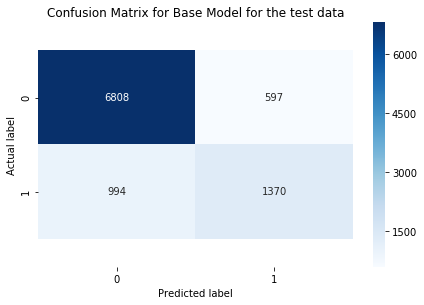

In [63]:
# Creating a heat map for the confusion matrix for Random forest base model on the test data
def conf_matrix_heatmap(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues" ,fmt='')
    plt.tight_layout()
    plt.title('Confusion Matrix for Base Model for the test data', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.8 # Add 0.8 to the bottom
    t -= 0.8 # Subtract 0.8 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

conf_matrix_heatmap(cf_matrix_rf_base_test)

In [64]:
# Creating a classification report for Random forest base model on the test data
clf_report_rf_base_test = metrics.classification_report(y_test, y_test_rf_base_pred)
print(clf_report_rf_base_test)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7405
           1       0.70      0.58      0.63      2364

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [65]:
# Calculating the ROC AUC score for Random forest base model on the test data
roc_auc_rf_base_test = metrics.roc_auc_score(y_test, y_test_rf_base_proba[:,1])
print(roc_auc_rf_base_test)

0.8631292479700572


Text(0, 0.5, 'Feature Importance')

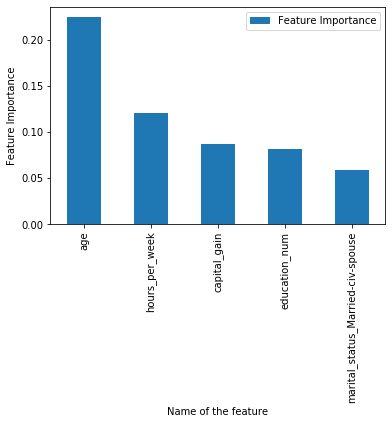

In [66]:
# Identifying the top 5 features and plotting them
# Feature importance plot
feature_imp_rf_base = pd.DataFrame({'Name of the feature': X_test.columns, 'Feature Importance': rf_base.feature_importances_})
feature_imp_rf_base = feature_imp_rf_base.sort_values('Feature Importance', ascending=False).head(5)
ax = feature_imp_rf_base.plot.bar(x='Name of the feature', y='Feature Importance')
ax.set_ylabel('Feature Importance')

In [67]:
# Sequence of feature importace for the Random forest base model
rf_base_importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_base.feature_importances_,3)})
rf_base_importances = rf_base_importances.sort_values('importance',ascending=False).set_index('feature')
rf_base_importances.head(5)

,importance
feature,
age,0.224
hours_per_week,0.121
capital_gain,0.087
education_num,0.081
marital_status_Married-civ-spouse,0.059


In [68]:
# predicting the classes using the Random forest base model on the train data
y_train_rf_base_pred  = rf_base.predict(X_train)

In [69]:
# predicting the probabilities using the Random forest base model on the train data
y_train_rf_base_proba  = rf_base.predict_proba(X_train)

In [70]:
# Generating the confusion matrix for Random forest base model on the train data
cf_matrix_rf_base_train = metrics.confusion_matrix(y_train, y_train_rf_base_pred)
cf_matrix_rf_base_train

array([[17102,   213],
       [  475,  5002]])

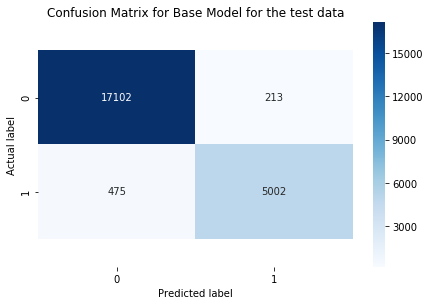

In [71]:
# Creating a heat map for the confusion matrix for Random forest base model on the test data

conf_matrix_heatmap(cf_matrix_rf_base_train)

In [72]:
# Creating a classification report for Random forest base model on the train data
clf_report_rf_base_train = metrics.classification_report(y_train, y_train_rf_base_pred)
print(clf_report_rf_base_train)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17315
           1       0.96      0.91      0.94      5477

    accuracy                           0.97     22792
   macro avg       0.97      0.95      0.96     22792
weighted avg       0.97      0.97      0.97     22792



In [73]:
# Calculating the ROC AUC score for Random forest base model on the train data
roc_auc_rf_base_train = metrics.roc_auc_score(y_train, y_train_rf_base_proba[:,1])
print(roc_auc_rf_base_train)

0.9958302303318565


The base model random forest classifier is definitely overfit at this point until we add some custom parameters to the base model random forest classifier . As we notice , the classification metrics for the train data is almost perfect and very much exceeding their corresponding metrics that we obtained using the base model on the test data. . It looks like the train data has been memorized and the base model is not going to perform well when its exposed to other data when the model is deployed to the production environment. Perfect classification for both the classes is observed in the train data along with almost equal to 1 values of metrics like precision , recall and f1-score . There is a huge gap between the training and testing data metrics of the random forest base model. The noise has been memorized and has to be take care of using regularization techniques.

# 3. AdaBoost Classifier - GridSearch:

In [74]:
# Creating an instance of Adaboost classifier with default parameters
ada = AdaBoostClassifier()

In [75]:
# Creating the parameter grid that can be used for the grid search CV

param_grid =  {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2,0.4,0.6,0.8,1, 1.2],
    'random_state' : [321]
}

In [76]:
# Creating a grid search object with all the necessary parameters
ada_gs_cv = GridSearchCV(ada, param_grid, cv=5, scoring='roc_auc',refit=True, n_jobs=-1, verbose=1)

In [77]:
# Fitting the grid search CV ADdaboost model on training data 
ada_gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [321]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [78]:
# Identifying and choosing the best model from the grid search
bestModel_ada = ada_gs_cv.best_estimator_
bestModel_ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.2,
                   n_estimators=400, random_state=321)

In [79]:
# Predicting the classes on the test data using Adaboost best model
y_pred_test_ada_best = bestModel_ada.predict(X_test)


In [80]:
# Calculating the predicted probabilities on the test data using Adaboost best model
y_pred_test_ada_best_proba = bestModel_ada.predict_proba(X_test)

In [81]:
# Generating the confusion matrix for Adaboost grid search best model on the test data
cf_matrix_ada_best_test = metrics.confusion_matrix(y_test, y_pred_test_ada_best)
cf_matrix_ada_best_test

array([[6973,  432],
       [ 820, 1544]])

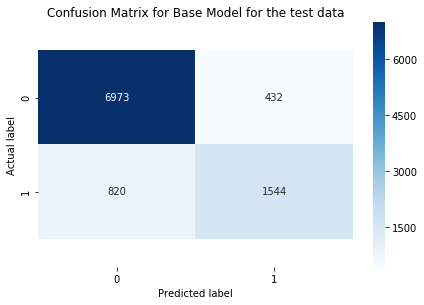

In [82]:
# Creating a heat map for the confusion matrix for Adaboost grid search best model on the test data
conf_matrix_heatmap(cf_matrix_ada_best_test)

In [83]:
# Creating a classification report for Adaboost grid search best model on the test data
clf_report_ada_best_test = metrics.classification_report(y_test, y_pred_test_ada_best)
print(clf_report_ada_best_test)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7405
           1       0.78      0.65      0.71      2364

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [84]:
# Calculating the ROC AUC score for Adaboost grid search best model on the test data
roc_auc_ada_best_test = metrics.roc_auc_score(y_test, y_pred_test_ada_best_proba[:,1])
print(roc_auc_ada_best_test)

0.9267887602811014


Text(0, 0.5, 'Feature Importance')

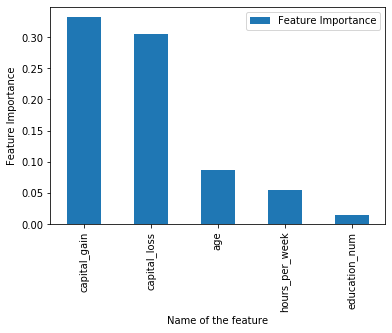

In [85]:
# Identifying the top 5 features and plotting them for the Adaboost grid search best model
# Feature importance plot
feature_imp_ada_best = pd.DataFrame({'Name of the feature': X_test.columns, 'Feature Importance': bestModel_ada.feature_importances_})
feature_imp_ada_best = feature_imp_ada_best.sort_values('Feature Importance', ascending=False).head(5)
ax = feature_imp_ada_best.plot.bar(x='Name of the feature', y='Feature Importance')
ax.set_ylabel('Feature Importance')

In [86]:
# Sequence of feature importance for the Adaboost best model
ada_best_importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(bestModel_ada.feature_importances_,3)})
ada_best_importances = ada_best_importances.sort_values('importance',ascending=False).set_index('feature')
ada_best_importances.head(5)

,importance
feature,
capital_gain,0.332
capital_loss,0.305
age,0.088
hours_per_week,0.055
education_num,0.015


In [87]:
# Predicting the classes on the train data using Adaboost best model
y_pred_train_ada_best = bestModel_ada.predict(X_train)

In [88]:
# Calculating the predicted probabilities on the train data using Adaboost best model
y_pred_train_ada_best_proba = bestModel_ada.predict_proba(X_train)

In [89]:
# Generating the confusion matrix for Adaboost grid search best model on the train data
cf_matrix_ada_best_train = metrics.confusion_matrix(y_train, y_pred_train_ada_best)
cf_matrix_ada_best_train

array([[16353,   962],
       [ 1921,  3556]])

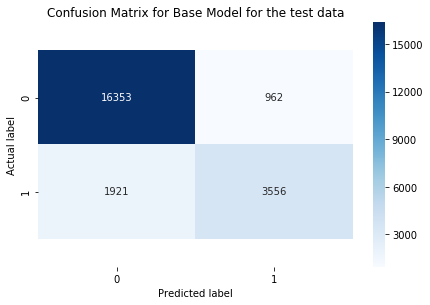

In [90]:
# Creating a heat map for the confusion matrix for Adaboost grid search best model on the train data
conf_matrix_heatmap(cf_matrix_ada_best_train)

In [91]:
# Creating a classification report for Adaboost grid search best model on the train data
clf_report_ada_best_train = metrics.classification_report(y_train, y_pred_train_ada_best)
print(clf_report_ada_best_train)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     17315
           1       0.79      0.65      0.71      5477

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



In [92]:
# Calculating the ROC AUC score for Adaboost grid search best model on the train data
roc_auc_ada_best_train = metrics.roc_auc_score(y_train, y_pred_train_ada_best_proba[:,1])
print(roc_auc_ada_best_train)

0.93154685508944


It is little surprising to observe that there is no overfitting because we do not see a huge gap in the values of the classifier metrics of the Adaboost grid search best model between the train and test data . Their values are almost the same . Although the grid search Adaboost model took a little longer to run but its performance is much better compared to the random forest base model.

# 4. Gradient Boosting Classifier - GridSearch:

In [93]:
# Setting up our param grid 
gb_params = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2,0.4,0.6,0.8,1.0],
    'max_depth': [1,2,3],
    'random_state' : [324]
}

In [94]:
# Creating a gradient boosting instance
gb = GradientBoostingClassifier()

In [95]:
# Creating a grid search object with all the necessary parameters for our Gradient boosting model
grid_search_gb = GridSearchCV(gb, gb_params, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)


In [96]:
# Fitting the grid search  Gradient boosting model on training data 
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...=None,
                                                  presort='aut

In [97]:
# Identifying and choosing the best model from the grid search for the Gradient boosting technique
bestModel_gb = grid_search_gb.best_estimator_
bestModel_gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=324, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [120]:
grid_search_gb.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 300,
 'random_state': 324}

In [98]:
# Predicting the classes on the test data using Gradient boosting best model
y_pred_test_gb_best = bestModel_gb.predict(X_test)

In [99]:
# Calculating the predicted probabilities on the test data using Gradient boosting best model
y_pred_test_gb_best_proba = bestModel_gb.predict_proba(X_test)

In [119]:
# Generating the confusion matrix for Gradient boosting best model on the test data
cf_matrix_gb_best_test = metrics.confusion_matrix(y_test, y_pred_test_gb_best)
cf_matrix_gb_best_test

array([[6967,  438],
       [ 788, 1576]])

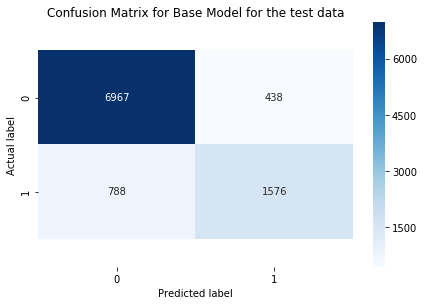

In [101]:
# Creating a heat map for the confusion matrix for Gradient boosting best model on the test data
conf_matrix_heatmap(cf_matrix_gb_best_test)

In [102]:
# Creating a classification report for Gradient boosting best model on the test data
clf_report_gb_best_test = metrics.classification_report(y_test, y_pred_test_gb_best)
print(clf_report_gb_best_test)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7405
           1       0.78      0.67      0.72      2364

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769



In [103]:
# Calculating the ROC AUC score for Gradient boosting best model on the test data
roc_auc_gb_best_test = metrics.roc_auc_score(y_test, y_pred_test_gb_best_proba[:,1])
print(roc_auc_gb_best_test)

0.927400370856569


Text(0, 0.5, 'Feature Importance')

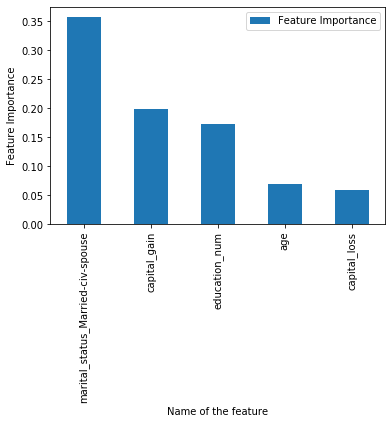

In [104]:
# Identifying the top 5 features and plotting them for the Gradient boosting best model
# Feature importance plot
feature_imp_gb_best = pd.DataFrame({'Name of the feature': X_test.columns, 'Feature Importance': bestModel_gb.feature_importances_})
feature_imp_gb_best = feature_imp_gb_best.sort_values('Feature Importance', ascending=False).head(5)
ax = feature_imp_gb_best.plot.bar(x='Name of the feature', y='Feature Importance')
ax.set_ylabel('Feature Importance')

In [105]:
# Sequence of feature importance for the Gradient boosting best model
gb_best_importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(bestModel_gb.feature_importances_,3)})
gb_best_importances = gb_best_importances.sort_values('importance',ascending=False).set_index('feature')
gb_best_importances.head(5)

,importance
feature,
marital_status_Married-civ-spouse,0.357
capital_gain,0.199
education_num,0.172
age,0.069
capital_loss,0.060


In [106]:
# Predicting the classes on the train data using Gradient boosting best model
y_pred_train_gb_best = bestModel_gb.predict(X_train)

In [107]:
# Calculating the predicted probabilities on the train data using Gradient boosting best model
y_pred_train_gb_best_proba = bestModel_gb.predict_proba(X_train)

In [108]:
# Generating the confusion matrix for Gradient boosting best model on the train data
cf_matrix_gb_best_train = metrics.confusion_matrix(y_train, y_pred_train_gb_best)
cf_matrix_gb_best_train

array([[16477,   838],
       [ 1698,  3779]])

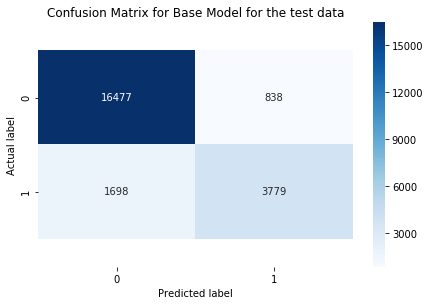

In [109]:
# Creating a heat map for the confusion matrix for Gradient boosting best model on the train data
conf_matrix_heatmap(cf_matrix_gb_best_train)

In [110]:
# Creating a classification report for Gradient boosting best model on the train data
clf_report_gb_best_train = metrics.classification_report(y_train, y_pred_train_gb_best)
print(clf_report_gb_best_train)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17315
           1       0.82      0.69      0.75      5477

    accuracy                           0.89     22792
   macro avg       0.86      0.82      0.84     22792
weighted avg       0.89      0.89      0.89     22792



In [111]:
# Calculating the ROC AUC score for Gradient boosting best model on the train data
roc_auc_gb_best_train = metrics.roc_auc_score(y_train, y_pred_train_gb_best_proba[:,1])
print(roc_auc_gb_best_train)

0.9454016114746724


There are no obvious signs of overfitting of our Gradient Boosting best model because the values of the classification metrics and also the ROC_AUC score between the train data and the test data is pretty much the same.
Gradient Boosting best model is able to generalize better compared to the Random forest base model and also the Adaboost model.This model doesnt really learn the noise and has almost the same level of accuracy between the test data and the train data.

# 5. XGBoost - RandomizedSearchCV

In [97]:
# Installing XGboost on the jupyter notebook
!pip install xgboost

     |████████████████████████████████| 1.2MB 218kB/s eta 0:00:01


In [107]:
conda install -c anaconda py-xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  anaconda
    conda-4.9.0                |           py37_0         3.0 MB  anaconda
    libxgboost-0.90            |       h0a44026_1         2.4 MB  anaconda
    py-xgboost-0.90            |   py37h0a44026_1          77 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/osx-64::_py-xgboost-mutex-2.0-cpu_0

In [112]:
# Creating an XGBoost parameter grid
xgb_param_grid = {
    'n_estimators': np.arange(100, 1000, 50),
    'learning_rate': np.arange(0.1, 1.6, 0.1),
    'max_depth': [1, 2],
    'gamma': np.arange(0, 5, 0.25)}

In [36]:
# Creating an XGBoost instance classifier
xgb_obj = xgb.XGBClassifier()

In [38]:
# Creating a grid search object with all the necessary parameters for our XGBoost model
grid_search_xgb = RandomizedSearchCV(xgb_obj, xgb_param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [39]:
# Fitting the grid search XGBoost model on training data 
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  5.5min remaining:   28.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   param_distributions={'gamma': array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75]),
                                     

In [40]:
# Identifying and choosing the best model from the grid search for the XGBoost model technique
bestModel_xgb = grid_search_xgb.best_estimator_
bestModel_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2.5,
              learning_rate=1.5000000000000002, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=650, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
# Predicting the classes on the test data using XGBoost best model
y_pred_test_xgb_best = bestModel_xgb.predict(X_test)

In [43]:
# Calculating the predicted probabilities on the test data using XGBoost best model
y_pred_test_xgb_best_proba = bestModel_xgb.predict_proba(X_test)

In [44]:
# Generating the confusion matrix for XGBoost best model on the test data
cf_matrix_xgb_best_test = metrics.confusion_matrix(y_test, y_pred_test_xgb_best)
cf_matrix_xgb_best_test

array([[6977,  428],
       [ 833, 1531]])

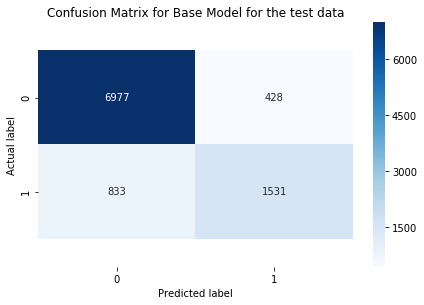

In [47]:
# Creating a heat map for the confusion matrix for XGBoost best model on the test data
conf_matrix_heatmap(cf_matrix_xgb_best_test)

In [48]:
# Creating a classification report for XGBoost best model on the test data
clf_report_xgb_best_test = metrics.classification_report(y_test, y_pred_test_xgb_best)
print(clf_report_xgb_best_test)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7405
           1       0.78      0.65      0.71      2364

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [49]:
# Calculating the ROC AUC score for XGBoost best model on the test data
roc_auc_xgb_best_test = metrics.roc_auc_score(y_test, y_pred_test_xgb_best_proba[:,1])
print(roc_auc_xgb_best_test)

0.9246898389184607


Text(0, 0.5, 'Feature Importance')

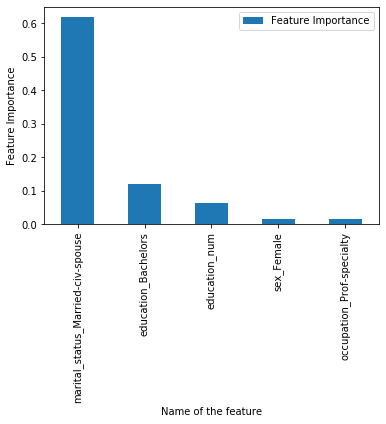

In [50]:
# Identifying the top 5 features and plotting them for the XGBoost best model
# Feature importance plot
feature_imp_xgb_best = pd.DataFrame({'Name of the feature': X_test.columns, 'Feature Importance': bestModel_xgb.feature_importances_})
feature_imp_xgb_best = feature_imp_xgb_best.sort_values('Feature Importance', ascending=False).head(5)
ax = feature_imp_xgb_best.plot.bar(x='Name of the feature', y='Feature Importance')
ax.set_ylabel('Feature Importance')

In [113]:
# Sequence of feature importance for the XGBoost best model
xgb_best_importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(bestModel_xgb.feature_importances_,3)})
xgb_best_importances = xgb_best_importances.sort_values('importance',ascending=False).set_index('feature')
xgb_best_importances.head(5)

,importance
feature,
marital_status_Married-civ-spouse,0.618
education_Bachelors,0.120
education_num,0.065
sex_Female,0.017
occupation_Prof-specialty,0.015


In [51]:
# Predicting the classes on the train data using XGBoost best model
y_pred_train_xgb_best = bestModel_xgb.predict(X_train)

In [52]:
# Calculating the predicted probabilities on the train data using XGBoost best model
y_pred_train_xgb_best_proba = bestModel_xgb.predict_proba(X_train)

In [53]:
# Generating the confusion matrix for XGBoost best model on the train data
cf_matrix_xgb_best_train = metrics.confusion_matrix(y_train, y_pred_train_xgb_best)
cf_matrix_xgb_best_train

array([[16380,   935],
       [ 1975,  3502]])

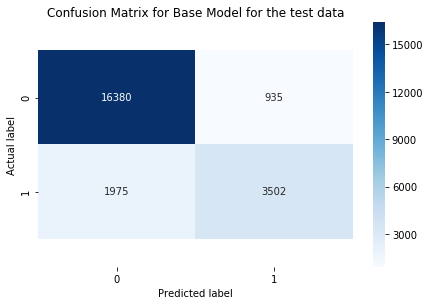

In [54]:
# Creating a heat map for the confusion matrix for XGBoost best model on the train data
conf_matrix_heatmap(cf_matrix_xgb_best_train)

In [55]:
# Creating a classification report for XGBoost best model on the train data
clf_report_xgb_best_train = metrics.classification_report(y_train, y_pred_train_xgb_best)
print(clf_report_xgb_best_train)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     17315
           1       0.79      0.64      0.71      5477

    accuracy                           0.87     22792
   macro avg       0.84      0.79      0.81     22792
weighted avg       0.87      0.87      0.87     22792



In [56]:
# Calculating the ROC AUC score for XGBoost best model on the train data
roc_auc_xgb_best_train = metrics.roc_auc_score(y_train, y_pred_train_xgb_best_proba[:,1])
print(roc_auc_xgb_best_train)

0.9282495497012129


The accuracy and the value of the classification metrics including the ROC_AUC score , precision , recall, F1 score are pretty much similar between the train and test data. The XGBoost model was able to generalize the data in a very good and optimized way without learning any noise. This is definitely an ideal model for us as for all practical purposes no further regularization is needed. This is significant improvement from the Random forest and other enemble techniques.

# 6. Moving into Conceptual Problems:

a) What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.

The weight of the predictor is been represented by the alpha parameter in the Adaboost technique. The value of the alpha parameter is same for all the predictors but as the algorithm proceeds iteratively , the weights are  adjusted for the misclassified samples. This is where the alpha plays a huge role in how the Adaboost algorithm functions.
Adabost is a stage-wise additive method and it emphasizes more on the misclassified instances in the training process or training samples and corrects the previous predictor.The value of alpha parameter is higher for the predictor that turned out to be accurate in the prediction or had a smaller error rate.

The alpha value is positive if the error rate is less than the value of 0.5. The value of alpha is exactly zero if the value of the error rate is 0.5. If the error rate goes beyond the value of 0.5 , then the value of alpha will take on a negative value. During the normalization process, the weights are adjusted and updated in a way such that the weights of the misclassified instances are increased and the weights of the correctly classified instances are decreased. Thereafter more attention is paid by the Adaboost technique to the instances that had increased weights compared to the instances with decreased weights .This process is repeated and comes to an end when we obtain desired number of predictors that optimizes the performance of the model or when a perfect combination of predictors is reached.   


b) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.

The model becomes ready to predict classes only when all the predictors have been trained and their respective weights have been determined. This process happens when the Adaboost model runs the test data through all the final predictors in the model. When any weak learner gives the output in the form of a class, the actual weight of this output class is determined by the weight of the predictors which in turn is determined by the alpha parameter value.
The class that is finally chosen by the adaboost technique is the class that has the maximum weight majority in which the alpha parameter plays a huge role as the weights of the predictors depend on it. Any class that receives the majority of the weighted votes wins in each prediction.

The quality or the performance or robustness of the final model totally depends on the alpha parameter value because the error made by the classifier is taken into account in every individual round. If the alpha value of any individual tree is small , it means the error value is large for that classifier and consequently not much attention is placed onto that classifier. this is how the whole adaboost modelling technique works and is majorly driven by the alpha parameter value.



c) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?

The max_depth parameter represents the depth of each individual decision tree in the gradient boosting technique which is again a step-wise additive method that combines the results of many individual weak learners to give rise to a strong learner. The weakest trees or the weak learners are those that have a very few nodes with not much depth within the tree and their results compared to random guessing are only marginally better.
Gradient boosting is an ensemble technique that corrects the predecessor trees in the training process by adding the predictors sequentially. it doesnt take all the predictors into consideration from the start.

The gradient boosting technique builds tree upon tree and tries to fit the residual errors that were made by the predecessors tree.Improving upon the errors of the predecessors tree gives rise to a better predictor and this is what we call as boosting . Hence the name boosting for this technique.  The repetition of this process occurs until we obtain the perfect combination of predictors or by the value specified by the "n_estimators" in the parameter grid that we feed to the model which is the parameter responsible for early stopping to prevent overfitting.

Max_depth controls the maximum depth of the individual decision trees. Deeper the tree , more number of splits it has and is able to better classify the training data eventually leading to having very low bias. But at the same time that leads to massive increase in the depth of each tree which may also lead to trees failing to generalizing on unseen data and learning the noise lewading to overfitting issue. The only way to fix the overfitting issue is to reduce the complexity of the trees which can easily done by tuning the max_depth parameter. This regularization technique of tuning the max depth param is called pruning and it helps in finding the right optimal balance and select the model that has very good overall performance. Even the rate of learning is also controlled by the max depth param by which we can whether we want the model to learn slowly or very quickly.

d) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).


We will print all the top features for all the models we implemented and try to see the common ones.

In [114]:
print("Random Forest Base Model top five predictors")
print(rf_base_importances.head(5))
print("*"*90)
print("\n\n")
print("AdaBoost best Model top five predictors")
print(ada_best_importances.head(5))
print("*"*90)
print("\n\n")
print("Gradient Boosting best Model top five predictors")
print(gb_best_importances.head(5))
print("*"*90)
print("\n\n")
print(" XGBoost best Model top five predictors")
print(xgb_best_importances.head(5))
print("*"*90)

Random Forest Base Model top five predictors
                                   importance
feature                                      
age                                     0.224
hours_per_week                          0.121
capital_gain                            0.087
education_num                           0.081
marital_status_Married-civ-spouse       0.059
******************************************************************************************



AdaBoost best Model top five predictors
                importance
feature                   
capital_gain         0.332
capital_loss         0.305
age                  0.088
hours_per_week       0.055
education_num        0.015
******************************************************************************************



Gradient Boosting best Model top five predictors
                                   importance
feature                                      
marital_status_Married-civ-spouse       0.357
capital_gain                 

"education_num" is the only predictor that stands out among all the top 5 of four models that we implemented. it is the only predictor that shows up consistently amoung all the implemented models. Besides that age, capital_gain and marital_status_Married-civ-spouse are other such predictors that appear in 3 out of 4 models which indicates that are also quite relevant. It makes sense to have "num_education" having the highest importance among all the other predictors in predicting whether the salary is above or less than $50k because number of years of years is directly linked or proportional to the salary since more educated a person is, more that person is likely to get a good highly skilled high paying job or job compensation.

Also capital gains through capital investment also impacts the level of cash flow or salary of a person. More number of capital gains , the bigger the salary. Age is also an important factor as higher the age , more experience or skills that person and is likely to make more money than the rest with a higher salary. Marital status also seems to have a direct impact on the level of salary and it also makes sense because a person can afford to start a family only if he has a good stable salary or job.

e) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.


We will print classification reports for all the models in order to comapre the performance among them.

In [115]:
print("Random Forest Base Model classification report")
print(clf_report_rf_base_test)
print("*"*90)
print("\n\n")
print("AdaBoost best Model classification report")
print(clf_report_ada_best_test)
print("*"*90)
print("\n\n")
print("Gradient Boosting best Model classification report")
print(clf_report_gb_best_test)
print("*"*90)
print("\n\n")
print(" XGBoost best Model classification report")
print(clf_report_xgb_best_test)
print("*"*90)

Random Forest Base Model classification report
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7405
           1       0.70      0.58      0.63      2364

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769

******************************************************************************************



AdaBoost best Model classification report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7405
           1       0.78      0.65      0.71      2364

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769

******************************************************************************************



Gradient Boosting best Model classification report
              prec

In [117]:
print("Random Forest Base Model ROC AUC score")
print(roc_auc_ada_best_test)
print("*"*90)
print("\n")
print("AdaBoost best Model ROC AUC score")
print(roc_auc_ada_best_test)
print("*"*90)
print("\n")
print("Gradient Boosting best Model ROC AUC score")
print(roc_auc_gb_best_test)
print("*"*90)
print("\n")
print(" XGBoost best Model ROC AUC score")
print(roc_auc_xgb_best_test)
print("*"*90)

Random Forest Base Model ROC AUC score
0.9267887602811014
******************************************************************************************


AdaBoost best Model ROC AUC score
0.9267887602811014
******************************************************************************************


Gradient Boosting best Model ROC AUC score
0.927400370856569
******************************************************************************************


 XGBoost best Model ROC AUC score
0.9246898389184607
******************************************************************************************


Looking at the classification metrics and the roc auc score , it is quite evident that the gradient boosting model technique outperformed all the other models. It has better precision , recall , f1 score, accuracy than the rest for both the classes. So gradient boosting is the only model that stands out in this case in terms of the overall performance. Gradient boosting seems to have a slight advantage compared to XGBoost and Adaboost models.

Now lets take a look at the hyper parameter grod of the gradient boosting best model.

In [121]:
grid_search_gb.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 300,
 'random_state': 324}

Now lets take a look at the hyper parameter grod of the XGboost best model.

In [122]:
grid_search_xgb.best_params_

{'n_estimators': 650,
 'max_depth': 1,
 'learning_rate': 1.5000000000000002,
 'gamma': 2.5}

In [ ]:
Now lets take a look at the hyper parameter grod of the Adaboost best model.

In [123]:
ada_gs_cv.best_params_

{'learning_rate': 1.2, 'n_estimators': 400, 'random_state': 321}

n_estimators, max_depth and thelearning_rate seems to be the common parameters in all of these models grid search.
learning rate of 0.2 , max depth of 3 and 300 trees seem to have been responsible for creating a model with the best performance that could optimally balance bias and variance thereby becoming an ideal model for us to choose.

f) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.


Text(0.5, 0, 'False Positive Rate')

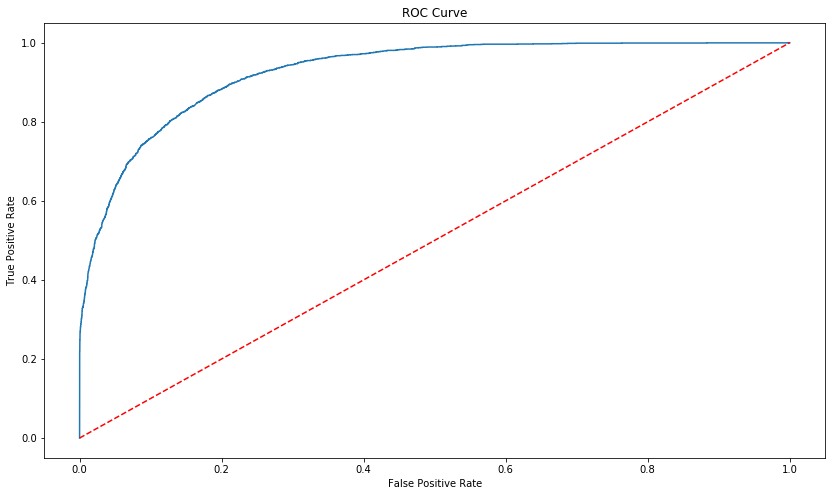

In [129]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_test_gb_best_proba[:,1])
roc_auc = metrics.roc_auc_score(y_test, y_pred_test_gb_best_proba[:,1])

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(fpr, tpr)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The X-axis here in the roc curve refers to the false positive rate which includes all the cases or instances where the salary was misclassified as above $50k even though th salary was supposed to be below $50k.
The y-axis refers to the true postive rate which includes all the cases where the actual salary was above $50k that were correctly classified as above $50k.
False positive rate indicates the ratio of negative events(below $50k) wrongly categorized as positive(above $50k) out of the total number of actual negative events. The true positive rate is defined as the ratio of actual positive events correctly identified as such.